Rebeca Durán Rodríguez Ejercicio 1

Número de pedidos exitosos por día (primeros 7 días):
Día 1: 11 pedidos exitosos (de 20)
Día 2: 13 pedidos exitosos (de 20)
Día 3: 14 pedidos exitosos (de 20)
Día 4: 12 pedidos exitosos (de 20)
Día 5: 14 pedidos exitosos (de 20)
Día 6: 15 pedidos exitosos (de 20)
Día 7: 17 pedidos exitosos (de 20)


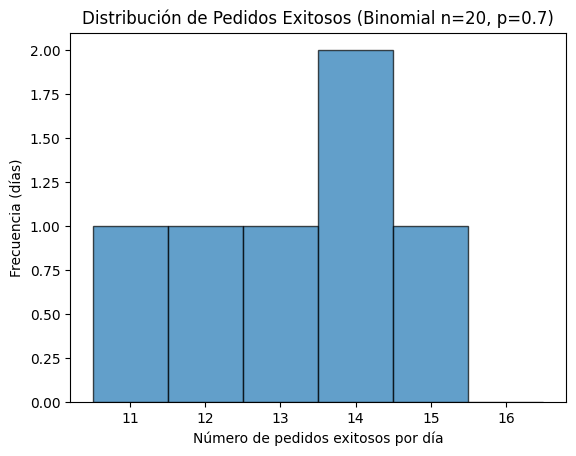

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb

# Parámetros del problema
n_pedidos = 20       # Pedidos diarios (n)
p_exito = 0.7        # Probabilidad de éxito (70%)
num_dias = 7         # Simulamos 7 días

# Generar números aleatorios uniformes U ~ Uniform(0, 1)
U = np.random.uniform(0, 1, num_dias)

# Función de masa de probabilidad (PMF) binomial
def binomial_pmf(n, k, p):
    return comb(n, k) * (p ** k) * ((1 - p) ** (n - k))

# Transformada inversa para generar valores binomiales
def binomial_inverse_transform(n, p, U):
    F_k = 0.0  # Inicializar la FDA acumulada
    k = 0
    while True:
        F_k += binomial_pmf(n, k, p)  # Acumular la probabilidad
        if U <= F_k:
            return k  # Devolver el número de pedidos exitosos
        k += 1

# Simular pedidos exitosos para cada día
pedidos_exitosos = [binomial_inverse_transform(n_pedidos, p_exito, u) for u in U]

# Mostrar resultados (primeros 7 días como "semana de ejemplo")
print("Número de pedidos exitosos por día (primeros 7 días):")
for dia in range(num_dias):
    print(f"Día {dia + 1}: {pedidos_exitosos[dia]} pedidos exitosos (de {n_pedidos})")

# Graficar histograma de frecuencias
plt.hist(pedidos_exitosos,
         bins=np.arange(min(pedidos_exitosos), max(pedidos_exitosos) + 1) - 0.5,
         edgecolor='black',
         alpha=0.7)
plt.title("Distribución de Pedidos Exitosos (Binomial n=20, p=0.7)")
plt.xlabel("Número de pedidos exitosos por día")
plt.ylabel("Frecuencia (días)")
plt.show()

El uso de variables aleatorias (como la distribución binomial en este caso) para modelar procesos como tiempos de servicio, atención al cliente, inactividad o gestión de inventarios ofrece ventajas clave en la toma de decisiones empresariales:

Previsión Realista:

Simular escenarios con incertidumbre (ej. pedidos exitosos, llegada de clientes, fallos en producción) permite anticipar comportamientos probables. Por ejemplo, en el problema del distribuidor, la binomial ayudó a predecir cuántos pedidos se satisfacen diariamente, facilitando la planificación del inventario.

Optimización de Recursos:

Al cuantificar eventos aleatorios (como la demanda variable), las empresas pueden ajustar recursos (stock, personal, maquinaria) para minimizar costos por exceso o faltantes. Por ejemplo, si la simulación muestra que en el 90% de los días se satisfacen entre 12 y 16 pedidos, el distribuidor puede mantener un stock cercano a ese rango.

Evaluación de Riesgos:

Técnicas como la transformada inversa (usada en el código) permiten generar datos sintéticos para analizar "peores casos" o escenarios extremos (ej. días con solo 5 pedidos exitosos). Esto es crítico en contextos como:

Atención al cliente: Simular colas con distribuciones Poisson para estimar tiempos de espera.

Mantenimiento: Modelar fallos con distribuciones exponenciales para programar revisiones.

Reducción de Costos Experimentales:

Simular con variables aleatorias evita pruebas físicas costosas o disruptivas (ej. probar políticas de inventario en un almacén real). En el ejemplo, el distribuidor pudo evaluar su desempeño sin afectar operaciones reales.

Adaptabilidad a Diversos Contextos:

La misma lógica aplica a:

Logística: Tiempos de entrega (distribución normal).

Manufactura: Tiempos de inactividad (distribución gamma).

TI: Fallos en servidores (distribución geométrica).